# 目录

第4章　基于概率论的分类方法：朴素贝叶斯

4.1　基于贝叶斯决策理论的分类方法

4.2　条件概率

4.3　使用条件概率来分类

4.4　使用朴素贝叶斯进行文档分类


4.5　使用Python进行文本分类

4.5.1　准备数据：从文本中构建词向量

4.5.2　训练算法：从词向量计算概率

（重要）4.5.3　测试算法：根据现实情况修改分类器

4.5.4　准备数据：文档词袋模型

（重要）4.6　示例：使用朴素贝叶斯过滤垃圾邮件

4.6.1　准备数据：切分文本

4.6.2　测试算法：使用朴素贝叶斯进行交叉验证

4.7　示例：使用朴素贝叶斯分类器从个人广告中获取区域倾向

4.7.1　收集数据：导入RSS源

4.7.2　分析数据：显示地域相关的用词

4.8　本章小结

前三节是理论，这里略过，细节详见原书。

# 4.4　使用朴素贝叶斯进行文档分类
朴素贝叶斯的一般过程：
- . 收集数据：可以使用任何方法。本章使用RSS源。
- . 准备数据：需要数值型或者布尔型数据
- . 分析数据：有大量特征时，绘制特征作用不大，
    此时使用直方图效果更好。
- . 训练算法：计算不同的独立特征的条件概率。
- . 测试算法：计算错误率。
- .使用算法：一个常见的朴素贝叶斯应用是文档分类。
    可以在任意的分类场景中使用朴素贝叶斯分类器，
    不一定非要是文本。

# 4.5　使用Python进行文本分类
词表到向量的转换函数

``` py
def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea',  'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how','to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]          
#1代表侮辱性文字，0代表正常言论
    return postingList,classVec
def createVocabList(dataSet):
    #❶ 创建一个空集
    vocabSet = set([])
    for document in dataSet:
        #❷  创建两个集合的并集  
        vocabSet = vocabSet | set(document)
    return list(vocabSet)
def setOfWords2Vec(vocabList, inputSet):
    #❸ 创建一个其中所含元素都为0的向量
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else: print "the word: %s is not in my Vocabulary!" % word
    return returnVec

```


In [1]:
## TRY

In [2]:
import bayes

In [3]:
listOPosts , listClasses = bayes.loadDataSet()
myVocabList = bayes.createVocabList(listOPosts)
#myVocabList

In [ ]:
'''
获得词汇表后，便可以使用函数setOfWords2Vec()
，该函数的输入参数为词汇表及某个文档，输出的是文档向量
，向量的每一元素为1或0，
分别表示词汇表中的单词在输入文档中是否出现

补全注释 遍历文档中的所有单词，
如果出现了词汇表中的单词，
则将输出的文档向量中的对应值设为1。
'''
import pdb;
#pdb.set_trace()
print bayes.setOfWords2Vec(myVocabList , listOPosts[0])
print bayes.setOfWords2Vec(myVocabList , listOPosts[3])

In [5]:
# above ??


## 4.5.2　训练算法：从词向量计算概率

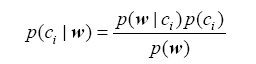

假设所有词都互相独立，该假设也称作条件独立性假设
，它意味着可以使用p(w0|ci)p(w1|ci)p(w2|ci)...p(wN|ci)
来计算上述概率，这就极大地简化了计算的过程。

该函数的伪代码如下：
```
计算每个类别中的文档数目
对每篇训练文档：
    对每个类别：
        如果词条出现在文档中→ 增加该词条的计数值
        增加所有词条的计数值
    对每个类别：
        对每个词条：
            将该词条的数目除以总词条数目得到条件概率
    返回每个类别的条件概率　　
    
```
真实代码如下
    
仅针对二分类，并且以下代码在本节被使用。



In [ ]:
#为了自定义参数，声明函数在此，还有记得行头 空格 变tab
from numpy import *

def trainNB0(trainMatrix,trainCategory):
	numTrainDocs = len(trainMatrix)
	numWords = len(trainMatrix[0])
	pAbusive = sum(trainCategory)/float(numTrainDocs)
	#❶ （以下两行）初始化概率
	p0Num = zeros(numWords); p1Num = zeros(numWords)
	p0Denom = 0.0; p1Denom = 0.0
	for i in range(numTrainDocs):
		if trainCategory[i] == 1:
			#❷（以下两行）向量相加
			p1Num += trainMatrix[i]
			p1Denom += sum(trainMatrix[i])
		else:
			p0Num += trainMatrix[i]
			p0Denom += sum(trainMatrix[i])
    p1Vect = p1Num/p1Denom #change to log()
	#❸ 对每个元素做除法
	p0Vect = p0Num/p0Denom #change to log()
	return p0Vect,p1Vect,pAbusive


#todo 移除 tab

In [7]:
#函数解释 todo

In [ ]:
import bayes
listOPosts , listClasses = bayes.loadDataSet()
myVocabList = bayes.createVocabList(listOPosts)
trainMat=[]
for postinDoc in listOPosts:
    trainMat.append(bayes.setOfWords2Vec(myVocabList,
postinDoc))

import pdb
pdb.set_trace()

p0V,p1V,pAb= trainNB0(trainMat , listClasses)

print pAb
print p0V
print p1V

- 词汇表中的第一个词是cute，
其在类别0中出现1次，而在类别1中从未出现。
对应的条件概率分别为0.041 666
67与0.0。该计算是正确的。

- 我们找找所有概率中的最大值，
该值出现在
P(1)数组第26个下标位置，大小为0.157 894
74。在myVocabList
的第26个下标位置上可以查到该单词是stupid。
这意味着stupid是最能表征类别1（侮辱性文档类）的单词

# 4.5.3　测试算法：根据现实情况修改分类器

- 如果其中一个概率值为0，那么最后的乘积也为0。
为降低这种影响，可以将所有词的出现数初始化为1，
并将分母初始化为2

- 由于大部分因子都非常小，连续相乘会下溢出或者得到不正确的答案
解决方法，自然对数化（拥有相同的单调性）
        
``` py
　朴素贝叶斯分类函数
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    #❶ 元素相乘
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)
    p0 = sum(vec2Classify * p0Vec) + log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else:
        return 0
     '''
     代码有4个输入：要分类的向量vec2Classify以及使用函数trainNB0()计算得到的三个概率。
使用NumPy的数组来计算两个向量相乘的结果❶。
这里的相乘是指对应元素相乘，即先将两个向量中的第1个元素相乘，然后将第2个元素相乘，以此类推。接下来将词汇表中所有词的对应值相加，
然后将该值加到类别的对数概率上。最后，比较类别的概率返回大概率对应的类别标签。
     '''
     
        
def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    
    # step b 
    p0V,p1V,pAb = trainNB0(array(trainMat),array(listClasses))
    
    # step c
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb)
    
    
    testEntry = ['stupid', 'garbage']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb)
```


In [ ]:
reload(bayes)

In [ ]:
import bayes

In [5]:
import pdb
#pdb.set_trace()

bayes.testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1




# bayes.testingNB() 实战
这是个 综合 函数，某种程度 大杂烩哈

代码追踪分析如下：

## .1 出现频度统计
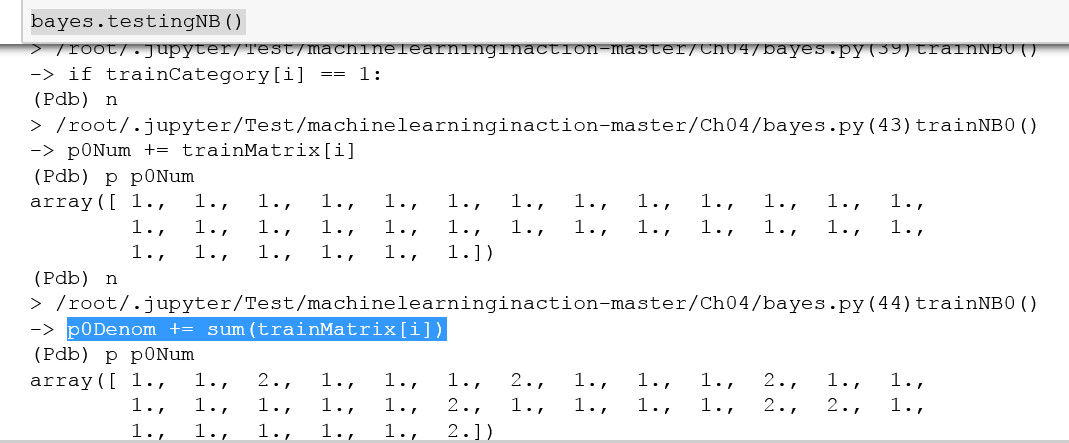

## .2 对数化前的 条件概率
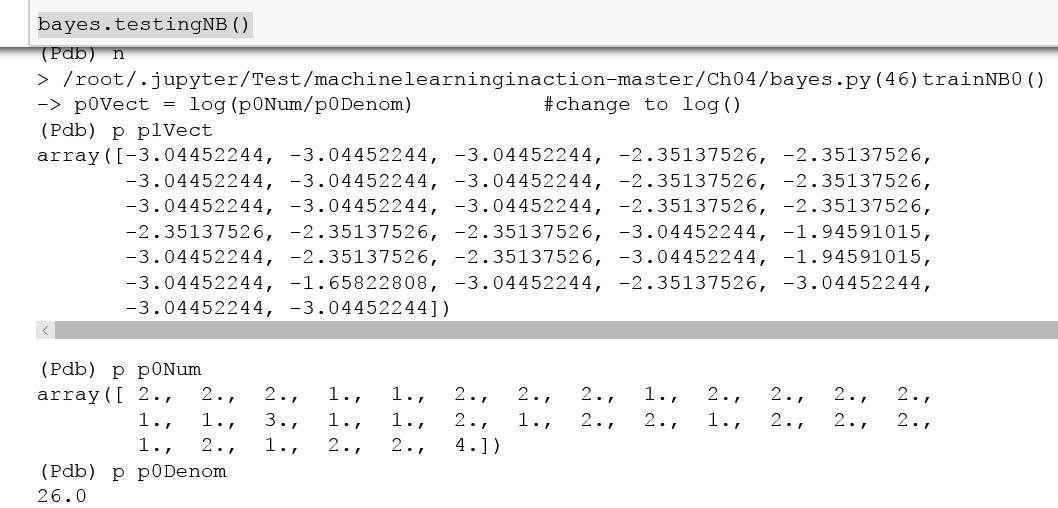
## .3 compute index for compare last
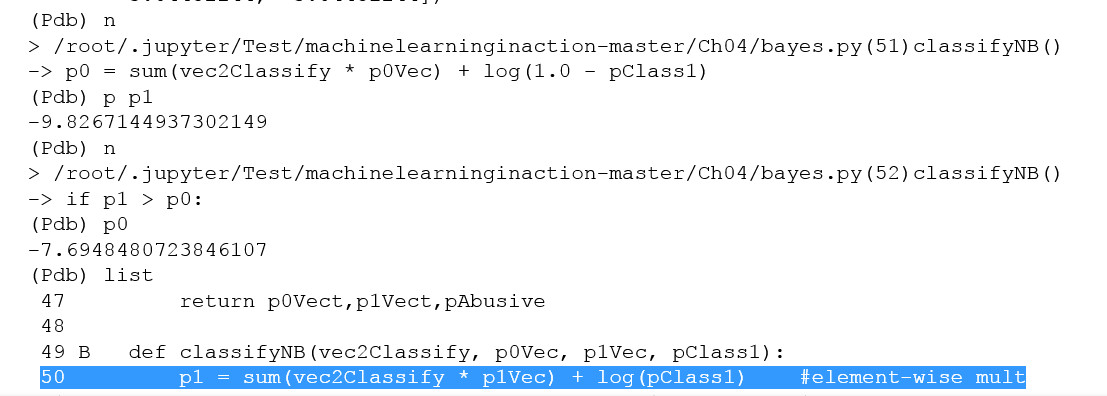

# 4.5.4　准备数据：文档词袋模型

  将每个词的出现与否作为一个特征，这可以被描述为词集模型（set-of-words model）。
  如果一个词在文档中出现不止一次，这可能意味着包含该词是否出现在文档中所不能表达的某种信息，这种方法被称为词袋模型（bag-of-words
model)

``` py

　朴素贝叶斯词袋模型
def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec
```




# 4.6　示例：使用朴素贝叶斯过滤垃圾邮件
分类器已经构建好了,我们将了解朴素贝叶斯的一个最著名的应用
：电子邮件垃圾过滤。
首先看一下如何使用通用框架来解决该问题。

示例：使用朴素贝叶斯对电子邮件进行分类
- 收集数据：提供文本文件。
- 准备数据：将文本文件解析成词条向量。
- 分析数据：检查词条确保解析的正确性。
- 训练算法：使用我们之前建立的trainNB0()函数。

- 测试算法：使用classifyNB()，并且构建一个新的测试函数来计算文档集的错误率。
- 使用算法：构建一个完整的程序对一组文档进行分类，将错分的文档输出到屏幕上

## 4.6.1　准备数据：切分文本

In [3]:
# test split
mySent='This book is the best book on Python or M.L. I have ever laid eyes upon.'
import re
regEx = re.compile('\\W*')
listOfTokens = regEx.split(mySent)

#ignore space and set lower
'''
当对URL进行切分时，会得到很多的词。
我们是想去掉这些单词，
因此在实现时会过滤掉长度小于3的字符串。
本例使用一个通用的文本解析规则来实现这一点。
在实际的解析程序中，
要用更高级的过滤器来对诸如HTML和URI的对象进行处理。
'''
[tok.lower() for tok in listOfTokens if len(tok) > 0]


['this',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'python',
 'or',
 'm',
 'l',
 'i',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon']

## 4.6.2　测试算法：使用朴素贝叶斯进行交叉验证

``` py
文件解析及完整的垃圾邮件测试函数

def textParse(bigString):
    import re
    listOfTokens = re.split(r'\W*', bigString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]
    
#66 如上 完整的使用上一个小节 实践内容

def spamTest():

    docList=[]; classList = []; fullText =[]
    
    for i in range(1,26):
        #❶ （以下七行）导入并解析文本文件
        wordList = textParse(open('email/spam/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        
        wordList = textParse(open('email/ham/%d.txt' % i).read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
        
    vocabList = createVocabList(docList)
    
    #背景，一共50个文件（正反例子各25个），随机抽出10个作为test,并del,剩余作为训练集
    
    trainingSet = range(50); testSet=[]
    #❷（以下四行）随机构建训练集
    for i in range(10):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:
        trainMat.append(setOfWords2Vec(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
        
        ## 熟悉不，o(^▽^)o
    p0V,p1V,pSpam = trainNB0(array(trainMat),array(trainClasses))
    
    errorCount = 0
    
    
    #❸（以下四行）对测试集分类
    for docIndex in testSet:
        wordVector = setOfWords2Vec(vocabList, docList[docIndex])
        
        ## 熟悉不 o(^▽^)o 分类器。上二个小节
        if classifyNB(array(wordVector),p0V,p1V,pSpam) !=
    classList[docIndex]:
           errorCount += 1
    print 'the error rate is: ',float(errorCount)/len(testSet)  

```

## 垃圾邮件 实战



In [6]:
import bayes
bayes.spamTest()

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 

In [7]:
bayes.spamTest()

the error rate is:  0.0


In [8]:
bayes.spamTest()

the error rate is:  0.0


In [9]:
bayes.spamTest()

classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1


In [10]:
bayes.spamTest()

the error rate is:  0.0


## 小结
- 上述连续重复做了5次实验，由于存在随机生成交叉用例集合，结果不稳定。
- 这里一直出现的错误是将垃圾邮件误判为正常邮件。相比之下
，将垃圾邮件误判为正常邮件要比将正常邮件归到垃圾邮件好
。为避免错误，有多种方式可以用来修正分类器，
这些将在第7章中进行讨论

# 4.7　示例：使用朴素贝叶斯分类器从个人广告中获取区域倾向

第一个例子是过滤网站的恶意留言，第二个是过滤垃圾邮件。
分类还有大量的其他应用
广告商往往想知道关于一个人的一些特定人口统计信息，以便能够更好地定向推销广告

示例：使用朴素贝叶斯来发现地域相关的用词
- 收集数据：从RSS源收集内容，
- 这里需要对RSS源构建一个接口。
- 准备数据：将文本文件解析成词条向量。
- 分析数据：检查词条确保解析的正确性。
- 训练算法：使用我们之前建立的trainNB0()函数。
- 测试算法：观察错误率，确保分类器可用。
    可以修改切分程序，以降低错误率，提高分类结果。
- 使用算法：构建一个完整的程序，封装所有内容。
    给定两个RSS源，该程序会显示最常用的公共词

In [13]:
#conda install feedparser
import feedparser
ny=feedparser.parse('http://newyork.craigslist.org/stp/index.rss')
len(ny['entries'])

25

## 类spamTest RSS源分类器及高频词去除函数 

``` py
　
#❶（以下四行）计算出现频率
'''
该函数遍历词汇表中的每个词并统计它在文本中出现的次数(freqDict)，
然后根据出现次数从高到低对词典进行排序，
最后返回排序最高的30个单词。
'''
def calcMostFreq(vocabList,fullText):
    import operator
    freqDict = {}
    for token in vocabList:
        freqDict[token]=fullText.count(token)
    sortedFreq = sorted(freqDict.iteritems(),
key=operator.itemgetter(1), reverse=True)
    return sortedFreq[:30]

'''
与程序清单4-5中的
spamTest()函数几乎相同，区别在于这里访问的是RSS源❷而不是文件。
然后调用函数calcMostFreq()
来获得排序最高的30个单词并随后将它们移除❸。
函数的剩余部分与spamTest()
基本类似，不同的是最后一行要返回下面要用到的值。

你可以注释掉用于移除高频词的三行代码，
然后比较注释前后的分类性能❸。我自己也尝试了一下，
去掉这几行代码之后，我发现错误率为54%，
而保留这些代码得到的错误率为70%。
'''

def localWords(feed1,feed0):
    import feedparser
    docList=[]; classList = []; fullText =[]
    minLen = min(len(feed1['entries']),len(feed0['entries']))
    for i in range(minLen):
        #❷ 每次访问一条RSS源
        wordList = textParse(feed1['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        wordList = textParse(feed0['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    #❸（以下四行）去掉出现次数最高的那些词  
    vocabList = createVocabList(docList)
    top30Words = calcMostFreq(vocabList,fullText)
    for pairW in top30Words:
        if pairW[0] in vocabList: vocabList.remove(pairW[0])
    trainingSet = range(2*minLen); testSet=[]
    for i in range(20):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:
        trainMat.append(bagOfWords2VecMN(vocabList,
docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB0(array(trainMat),array(trainClasses))
    errorCount = 0
    for docIndex in testSet:
        wordVector = bagOfWords2VecMN(vocabList,
docList[docIndex])
        if classifyNB(array(wordVector),p0V,p1V,pSpam) != \
            classList[docIndex]:
            errorCount += 1
    print 'the error rate is: ',float(errorCount)/len(testSet)
    return vocabList,p0V,p1V
```

代码 实地比较
- 数据源差别
- 总数量的差异
- not 词 集合模型，而是 词袋模型
详细比较如图
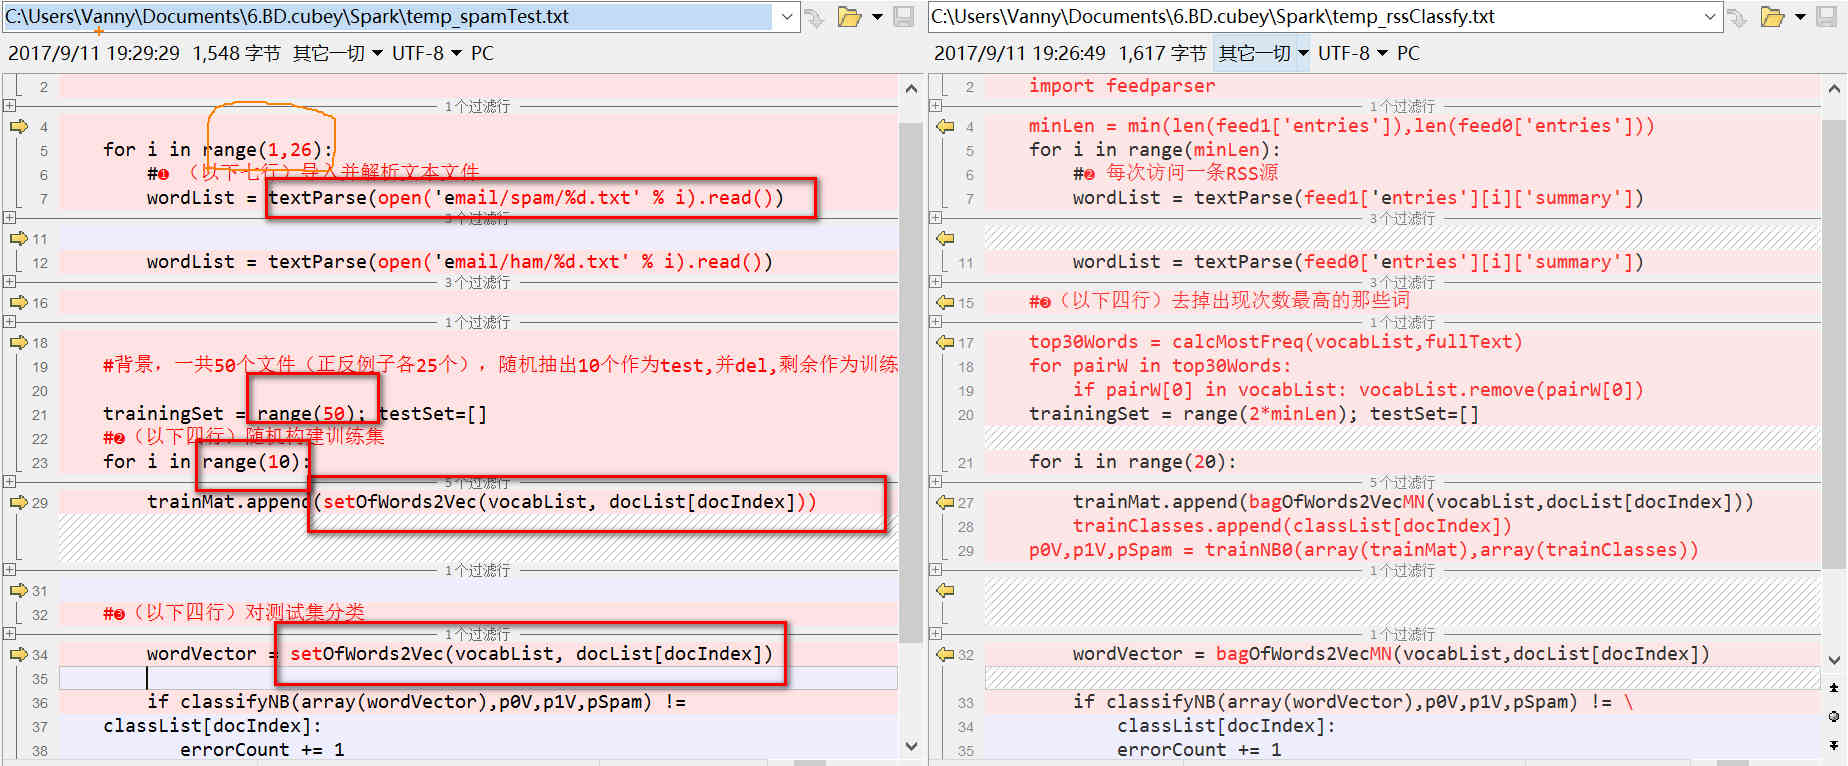

## 实战

In [17]:
## 实战
reload(bayes)
ny=feedparser.parse('http://newyork.craigslist.org/stp/index.rss')
sf=feedparser.parse('http://sfbay.craigslist.org/stp/index.rss')
vocabList,pSF,pNY=bayes.localWords(ny,sf)


the error rate is:  0.25


In [18]:
 vocabList,pSF,pNY=bayes.localWords(ny,sf)

the error rate is:  0.35


## 小结 
- 为了得到错误率的精确估计，应该多次进行上述实验，然后取平均值。
- 这里的错误率要远高于垃圾邮件中的错误率。由于这里关注的是单词概率而不是实际分类，因此这个问题倒不严重。
- 可以通过函数caclMostFreq()改变要移除的单词数目，然后观察错误率的变化情况

## 4.7.2　分析数据：显示地域相关的用词

　最具表征性的词汇显示函数
``` py

def getTopWords(ny,sf):
    import operator
    vocabList,p0V,p1V=localWords(ny,sf)
    topNY=[]; topSF=[]
    for i in range(len(p0V)):
        if p0V[i] > -6.0 : topSF.append((vocabList[i],p0V[i]))
        if p1V[i] > -6.0 : topNY.append((vocabList[i],p1V[i]))
    sortedSF = sorted(topSF, key=lambda pair: pair[1],
reverse=True)
    print
"SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**"
    for item in sortedSF:
        print item[0]
    sortedNY = sorted(topNY, key=lambda pair: pair[1],
reverse=True)
    print
"NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY
**"
    for item in sortedNY:
        print item[0]
```
程序清单4-7中的函数getTopWords()
- 使用两个RSS源作为输入，然后训练并测试朴素贝叶斯分类器，返回使用的概率值。
- 然后创建两个列表用于元组的存储。与之前返回排名最高的X个单词不同，这里可以返回大于某个阈值的所有词。这些元组会按照它们的条件概率进行排序



In [19]:
import bayes
bayes.getTopWords(ny,sf)

the error rate is:  0.35
SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**
women
had
into
accidentally
enjoy
beauty
pay
hobby
girlfriends
their
take
seductive
artistic
pictures
photography
taking
photos
husbands
womans
nude
boyf
videography
all
very
indian
new
smoke
love
same
fall
along
more
guys
maybe
where
platonic
any
don
sex
gay
things
older
well
because
single
augustine
hanging
blaze
minded
guy
says
explore
experience
prefer
semester
would
live
type
india
basically
work
movies
fla
male
want
honest
needs
sit
travel
spot
own
somewhere
interesting
coffee
seeking
safe
nov
day
name
always
doing
idea
30yo
girl
sexual
open
wanted
could
traveler
city
bears
girls
way
relationship
grew
boring
ecuador
talking
160lbs
opposite
park
plan
stoner
show
planning
find
ground
one
based
title
unhappy
haven
going
local
oct
hope
truly
bay
stuff
college
recently
please
men
come
figured
many
active
been
much
life
hmu
myself
straight
while
tease
everyday
dab
make
drink
ease
around
buddies
so

# 章节小结
原文：

对于分类而言，使用概率有时要比使用硬规则更为有效。
贝叶斯概率及贝叶斯准则提供了一种利用已知值来估计未知概
率的有效方法。

可以通过特征之间的条件独立性假设，降低对数据量的需求。
独立性假设是指一个词的出现概率并不依赖于文档中的其他词
。当然我们也知道这个假设过于简单。
这就是之所以称为朴素贝叶斯的原因。
尽管条件独立性假设并不正确，但是朴素贝叶斯仍然是一种有效的分类器。
　
利用现代编程语言来实现朴素贝叶斯时需要考虑很多实际因素
。下溢出就是其中一个问题，它可以通过对概率取对数来解决
。词袋模型在解决文档分类问题上比词集模型有所提高。
还有其他一些方面的改进，比如说移除停用词，
当然也可以花大量时间对切分器进行优化。

本章学习到的概率理论将在后续章节中用到，
另外本章也给出了有关贝叶斯概率理论全面具体的介绍。
接下来的一章将暂时不再讨论概率理论这一话题。

![](https://media.giphy.com/media/Z5VQh0fqT54xG/giphy.gif)

个人总结
- 实战认识 bayes模型
- 实战认识 处理下溢出 + 词袋模型
- 调试器追踪bayes 分类器classfyNB，认识部分细节
- 当前没有涉及太多切分器 停用词的优化等